In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tyssue.generation import generate_ring
from tyssue.solvers.sheet_vertex_solver import Solver

from tyssue_taylor.adjusters.adjust_annular import prepare_tensions
from tyssue_taylor.models.annular import AnnularGeometry as geom
from tyssue_taylor.models.annular import model
from tyssue_taylor.models.display import create_organo

Error: IPOPT shared library failed to import


Using TensorFlow backend.


In [2]:
nf, r_in, r_out = (20, 1, 2)
seed = 1
organo = create_organo(nf, r_in, r_out)

Reseting datasets values with new specs


The issue is that the lumen volume of the theoritical organoid is modified when solving the experimental organoid for the energy minimum. In my opinion this should not happen.

In [3]:
organo_eq_cst = organo.copy()
organo_eq_cst.edge_df.loc[:, 'line_tension'] = prepare_tensions(organo_eq_cst,
                                                                np.random.normal(0.01, 0.01, 3*organo.Nf))
organo_eq_cst.face_df.loc[:, 'prefered_area'] = (organo_eq_cst.face_df.area.values +
                                                 np.random.normal(0, 0.01, organo.Nf))
organo_eq_cst.settings['lumen_prefered_vol'] = organo_eq_cst.settings['lumen_volume'] + np.random.normal(0, 0.01)
print(organo.settings)
Solver.find_energy_min(organo_eq_cst, geom, model)
print(organo.settings)
print('The theoritical organo\'s lumen volume has been modified by Solver.find_energy_min')

{'geometry': 'planar', 'R_in': 1.3611892592378545, 'R_out': 2.722378518475709, 'R_vit': None, 'lumen_volume': 11.451157468552399, 'lumen_elasticity': 1.0, 'lumen_prefered_vol': 11.4424492629659}
{'geometry': 'planar', 'R_in': 1.3611892592378545, 'R_out': 2.722378518475709, 'R_vit': None, 'lumen_volume': 11.443863543017354, 'lumen_elasticity': 1.0, 'lumen_prefered_vol': 11.4424492629659}
The theoritical organo's lumen volume has been modified by Solver.find_energy_min


It gets worst with consecutive calls of the solving.

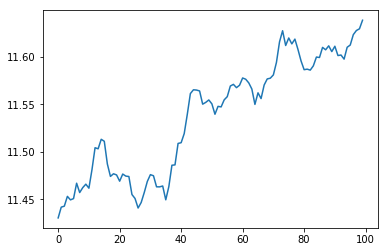

In [4]:
iterations = np.arange(100)
volumes = np.zeros(iterations.shape)
for i in iterations:
    organo_eq_cst = organo.copy()
    organo_eq_cst.edge_df.loc[:, 'line_tension'] = prepare_tensions(organo_eq_cst,
                                                                    np.random.normal(0.01, 0.01, 3*organo.Nf))
    organo_eq_cst.face_df.loc[:, 'prefered_area'] = (organo_eq_cst.face_df.area.values +
                                                     np.random.normal(0, 0.01, organo.Nf))
    organo_eq_cst.settings['lumen_prefered_vol'] = organo_eq_cst.settings['lumen_volume'] + np.random.normal(0, 0.01)
    Solver.find_energy_min(organo_eq_cst, geom, model)
    volumes[i] = organo.settings['lumen_volume']
plt.plot(iterations, volumes)